### Import ProjectShedulingModel and EventList

In [15]:
from SchedulingProblem import ProjectSchedulingModel
from EventList import EventList

### Load problem instance

In [16]:
psmodel = ProjectSchedulingModel.from_file("j30.sm/j305_4.sm")

### Create random solution and visualization

In [46]:
solution = EventList(psmodel)
print("valid solution:", psmodel.validate_solution(solution))
print(solution)

valid solution: True
Event 0 at time 0, jobs: 1, 3
Event 1 at time 6, jobs: 12, 4
Event 2 at time 16, jobs: 6, 9, 5, 22
Event 3 at time 22, jobs: 8, 2
Event 4 at time 24, jobs: 18
Event 5 at time 29, jobs: 11, 14
Event 6 at time 38, jobs: 7, 20
Event 7 at time 45, jobs: 24, 13
Event 8 at time 50, jobs: 16
Event 9 at time 59, jobs: 15, 19, 17
Event 10 at time 64, jobs: 25, 23
Event 11 at time 72, jobs: 28, 10, 21
Event 12 at time 81, jobs: 29, 26
Event 13 at time 83, jobs: 30, 27
Event 14 at time 90, jobs: 31
Event 15 at time 97, jobs: 32



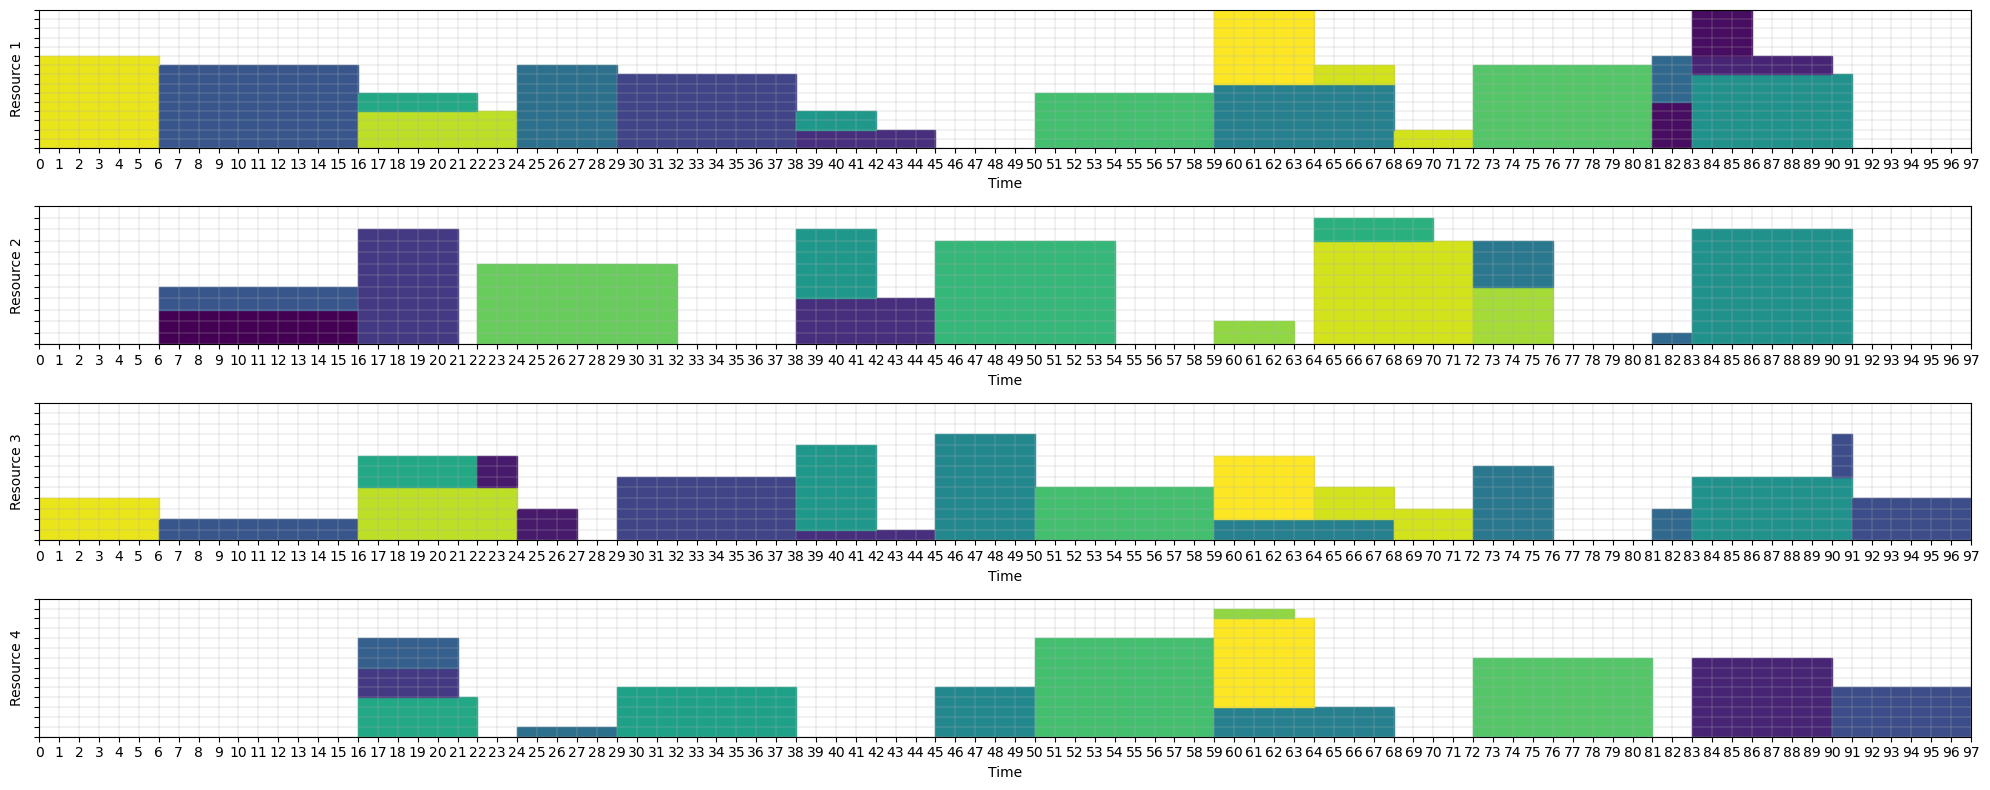

In [47]:
solution.plot()

### Validate 1000 random solutions

In [5]:
sols = [EventList(psmodel) for _ in range(1000)]
validations = [psmodel.validate_solution(sol) for sol in sols]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Validate 1000 random local solutioins

In [31]:
validations = [psmodel.validate_solution(EventList(psmodel=psmodel).generate_new_local_solution(steps=1)) for _ in range(1000)]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


In [32]:
solutions = [EventList(psmodel) for _ in range(1000)]
local_solutions = [s.generate_new_local_solution() for s in solutions]
validations = [psmodel.validate_solution(sol) for sol in solutions]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Validate 1000 recombination solutions

In [8]:
validations = [psmodel.validate_solution(EventList(psmodel).recombine_solution(EventList(psmodel))) for _ in range(1000)]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


In [9]:
solutions = [EventList(psmodel).recombine_solution(EventList(psmodel)) for _ in range(1000)]
validations = [psmodel.validate_solution(sol) for sol in solutions]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Artificial Bee Colony

In [4]:
import random
import numpy as np

In [29]:
# INTIALIZE POPULATION
N = 500
limit = len(psmodel.jobs)*len(psmodel.resources.resourcesList)/2
MaxIter = 200
food_sources = [EventList(psmodel) for _ in range(N)]
updates = np.zeros(N)
best_solution = min(food_sources, key=lambda x: x.get_makespan())

ITERATION # 0
ITERATION # 10
ITERATION # 20
ITERATION # 30
ITERATION # 40
ITERATION # 50
ITERATION # 60
ITERATION # 70
ITERATION # 80
ITERATION # 90
ITERATION # 100
ITERATION # 110
ITERATION # 120
ITERATION # 130
ITERATION # 140
ITERATION # 150
ITERATION # 160
ITERATION # 170
ITERATION # 180
ITERATION # 190


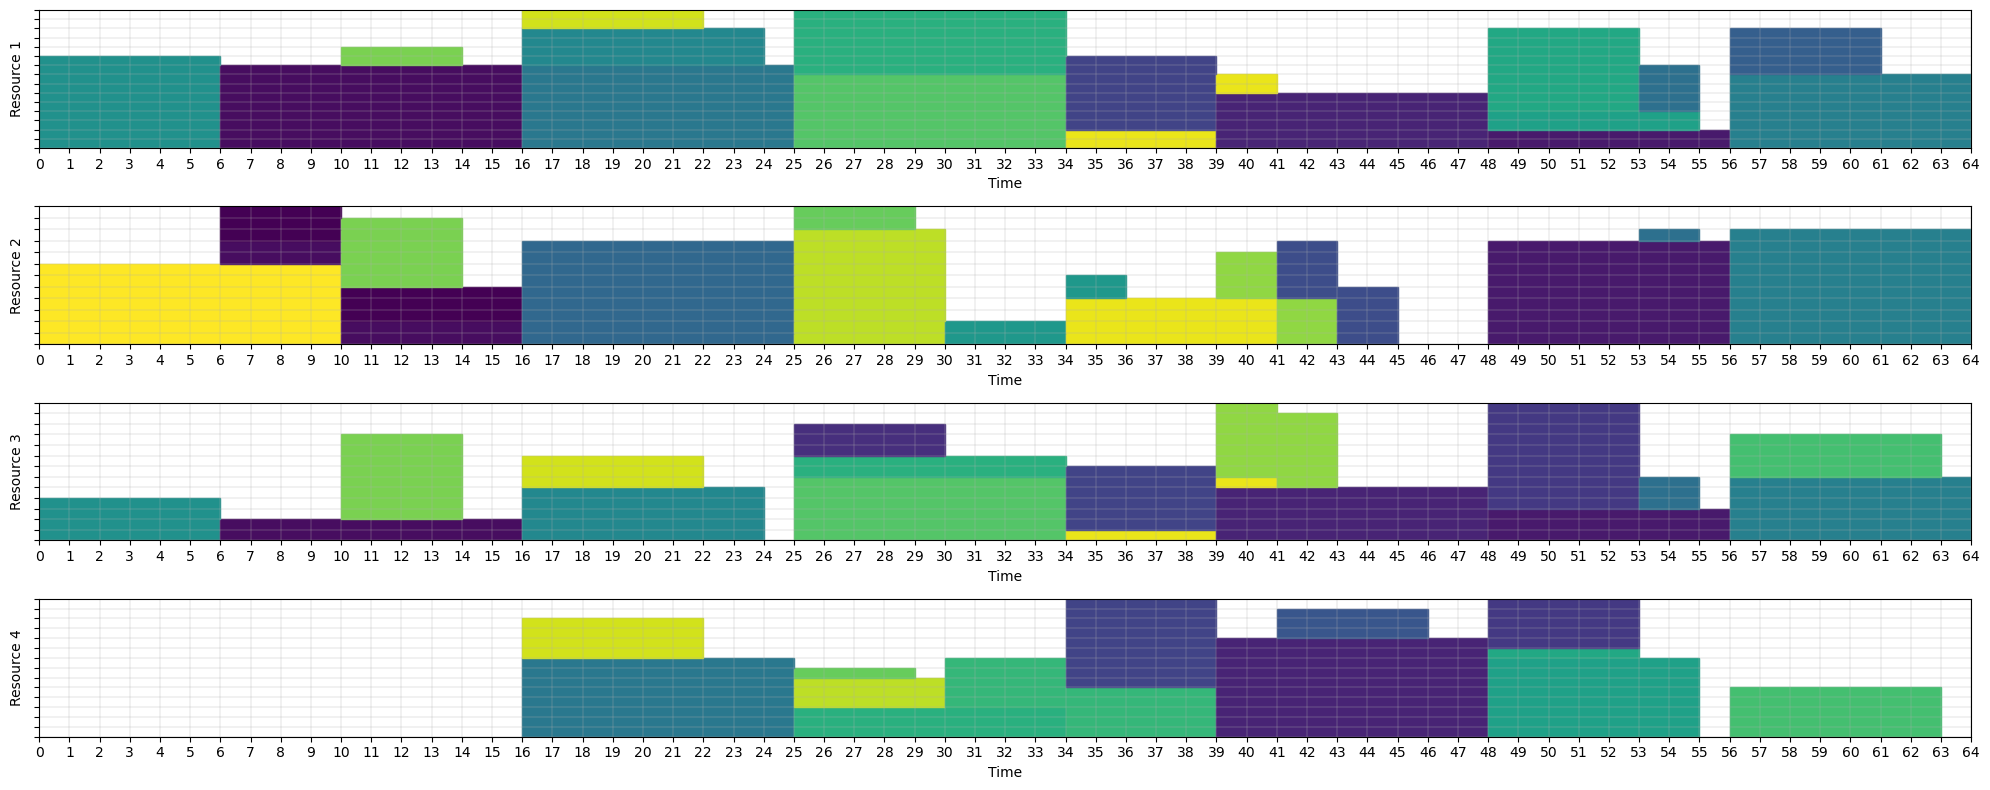

In [30]:
for j in range(MaxIter):
    
    if j % 10 == 0:
        print("ITERATION #", j)
        
    # EMPLOYED BEE PHASE
    for i in range(N):
        updates[i] += 1 
        new_solution = food_sources[i].generate_new_local_solution()     
        if new_solution.get_makespan() < food_sources[i].get_makespan():
            food_sources[i] = new_solution
            updates[i] = 0
            
    # ONLOOKER BEE PHASE
    for i in range(N):
        random_indexes = random.sample(range(N), 3)
        selected = min(random_indexes, key=lambda x: food_sources[x].get_makespan())
        updates[selected] += 1
        
        new_solution = food_sources[selected].generate_new_local_solution()
        
        if new_solution.get_makespan() < food_sources[selected].get_makespan():
            food_sources[selected] = new_solution
            updates[selected] = 0

            
    iteration_best = min(food_sources, key=lambda x: x.get_makespan())
    # _ = print(j, "new best solution:", best_solution.get_makespan()) if iteration_best.get_makespan() < best_solution.get_makespan() else None
    best_solution = iteration_best if iteration_best.get_makespan() < best_solution.get_makespan() else best_solution
        
    # SCOUT BEE PHASE
    selected = np.where(updates > limit)[0]
    for i in selected:
        food_sources[i] = EventList(psmodel)
        updates[i] = 0
        
best_solution.plot()